# **Challenge Overview – Stock Agent**

Acting as consultants for an investment fund managing a portfolio of 11 stocks, your goal is to build an AI-powered solution that enhances investment decision-making. You may focus on the full portfolio or a specific subset. The aim is to demonstrate how AI can drive financial insights, whether through a trading agent, an analytical dashboard, or another innovative tool.
<br>
<br>
### **Tech & Tools**

It is mandatory to develop the solution in **Google Colab** using **Python**.

Other than that, you are completely free to choose your own:

•	Libraries and packages: Use any tool you need (e.g., Pandas, Scikit-learn, LangChain, etc.)

•	Visualization tools: Python-based tools (Matplotlib, Seaborn), Power BI, Tableau, etc. (if you use external visualization tools, don't forget to include prints in the submission zip folder)

•	AI assistants: Feel free to consult ChatGPT, GitHub Copilot, Gemini, or any other.
<br>
<br>
### **Tech Configuration**

**1** - The second code cell contains the code needed to export the dataset for the 11 assets. All data is saved as individual .csv files in a data/ directory, named according to the asset and frequency (e.g., AMZN_hourly.csv or AMZN_daily.csv).

**2** - The remaining cells include functions suggested by the dev team to help accelerate your solution. Each function comes with a description of its purpose and examples of expected usage. Feel free to use, adapt, extend, or completely rework them to fit your approach.

# Installs & Imports

In [51]:
%pip install protobuf==5.29.0 -q
%pip install yfinance==0.2.59 pandas==2.2.2 matplotlib==3.7.5 seaborn==0.13.2 -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf

**Data Fetching**

In [53]:
DATA_PATH = 'data/'

In [54]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import os

# List of symbols to download
symbols = ["AMZN", "AAPL", "GOOGL", "MSFT", "UDMY", "NXE", "SPY",
           "CDR.WA", "EH", "BTC-USD", "ETH-USD"]

# Set date range
end_date = datetime.now()
start_date = end_date - timedelta(days=730)

start_str = start_date.strftime('%Y-%m-%d')
end_str = end_date.strftime('%Y-%m-%d')

print(f"Downloading hourly data from {start_str} to {end_str} (729 days)")

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Download data for each symbol
for symbol in symbols:
    print(f"\nDownloading hourly data for {symbol}...")

    try:
        # Download hourly data
        data = yf.download(symbol, start=start_str, end=end_str, interval="1h", progress=False)

        if not data.empty:
            # Reset index to make Datetime a column
            data.reset_index(inplace=True)

            # Save to CSV
            safe_name = symbol.replace('-', '_').replace('.', '_')
            filename = f"data/{safe_name}_hourly.csv"
            data.to_csv(filename, index=False)
            print(f"Successfully downloaded {len(data)} rows of hourly data for {symbol}")

            # Display the first 5 rows of data
            print(f"\nFirst 5 rows of {symbol} data:")
            print(data.head())

        else:
            print(f"No hourly data available for {symbol}")

            # Try daily data instead
            print(f"Attempting to download daily data for {symbol} instead...")
            daily_data = yf.download(symbol, start=(start_date - timedelta(days=365)).strftime('%Y-%m-%d'),
                                    end=end_str, interval="1d", progress=False)

            if not daily_data.empty:
                daily_data.reset_index(inplace=True)
                filename = f"data/{symbol.replace('-', '_').replace('.', '_')}_daily.csv"
                daily_data.to_csv(filename, index=False)
                print(f"Successfully downloaded {len(daily_data)} rows of daily data for {symbol}")

                # Display the first 5 rows of daily data
                print(f"\nFirst 5 rows of {symbol} daily data:")
                print(daily_data.head())
            else:
                print(f"Failed to download any data for {symbol}")

    except Exception as e:
        print(f"Error downloading data for {symbol}: {str(e)}")

# Create summary of downloaded files
file_info = []
for symbol in symbols:
    safe_name = symbol.replace('-', '_').replace('.', '_')
    hourly_path = f"data/{safe_name}_hourly.csv"
    daily_path = f"data/{safe_name}_daily.csv"

    if os.path.exists(hourly_path):
        df = pd.read_csv(hourly_path)
        file_info.append({
            'Symbol': symbol,
            'Filename': hourly_path,
            'Rows': len(df),
            'Start Date': df['Datetime'].iloc[0],
            'End Date': df['Datetime'].iloc[-1],
            'Frequency': 'Hourly'
        })
    elif os.path.exists(daily_path):
        df = pd.read_csv(daily_path)
        file_info.append({
            'Symbol': symbol,
            'Filename': daily_path,
            'Rows': len(df),
            'Start Date': df['Date'].iloc[0],
            'End Date': df['Date'].iloc[-1],
            'Frequency': 'Daily'
        })
    else:
        file_info.append({
            'Symbol': symbol,
            'Filename': 'N/A',
            'Rows': 0,
            'Start Date': 'N/A',
            'End Date': 'N/A',
            'Frequency': 'N/A'
        })

# Display file summary
file_summary = pd.DataFrame(file_info)
print("\nFile Summary:")
print(file_summary)

print("\nData collection complete!")


1 Failed download:
['AMZN']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


No hourly data available for AMZN
Attempting to download daily data for AMZN instead...



1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')

1 Failed download:
['GOOGL']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for AMZN

First 5 rows of AMZN daily data:
Price        Date       Close        High         Low        Open     Volume
Ticker                   AMZN        AMZN        AMZN        AMZN       AMZN
0      2022-05-31  120.209503  121.994499  115.675003  116.279999  144634000
1      2022-06-01  121.683998  125.179001  120.622498  122.255997  127528000
2      2022-06-02  125.511002  125.610001  120.044998  121.683998  100560000
3      2022-06-03  122.349998  124.400002  121.046501  124.199997   97604000
4      2022-06-06  124.790001  128.990005  123.809998  125.250000  135269000

No hourly data available for AAPL
Attempting to download daily data for AAPL instead...
Successfully downloaded 751 rows of daily data for AAPL

First 5 rows of AAPL daily data:
Price        Date       Close        High         Low        Open     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2022-05-31  146.489822  148.281


1 Failed download:
['MSFT']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for GOOGL

First 5 rows of GOOGL daily data:
Price        Date       Close        High         Low        Open    Volume
Ticker                  GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
0      2022-05-31  113.220703  115.184315  111.545211  112.210032  50012000
1      2022-06-01  113.350075  116.544306  112.711131  114.308498  36606000
2      2022-06-02  117.062828  117.338510  112.409082  113.457567  37992000
3      2022-06-03  113.995995  115.768025  112.978361  115.510255  26136000
4      2022-06-06  116.264641  118.779116  115.611263  116.149188  33542000

No hourly data available for MSFT
Attempting to download daily data for MSFT instead...



1 Failed download:
['UDMY']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for MSFT

First 5 rows of MSFT daily data:
Price        Date       Close        High         Low        Open    Volume
Ticker                   MSFT        MSFT        MSFT        MSFT      MSFT
0      2022-05-31  265.144257  267.972508  262.276986  265.787933  37827700
1      2022-06-01  265.680725  270.820342  263.359598  268.391951  25292200
2      2022-06-02  267.787231  267.855507  255.128359  257.907860  44008200
3      2022-06-03  263.340057  266.685226  261.769901  263.622891  28059000
4      2022-06-06  262.101471  267.397133  260.609322  265.329583  22400300

No hourly data available for UDMY
Attempting to download daily data for UDMY instead...



1 Failed download:
['NXE']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')

1 Failed download:
['SPY']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for UDMY

First 5 rows of UDMY daily data:
Price        Date  Close   High     Low   Open   Volume
Ticker              UDMY   UDMY    UDMY   UDMY     UDMY
0      2022-05-31  14.75  15.96  14.360  15.69  1177100
1      2022-06-01  13.45  14.92  13.370  14.59  1331000
2      2022-06-02  14.00  14.21  13.070  13.39  1407000
3      2022-06-03  14.27  14.39  13.325  13.85  1066300
4      2022-06-06  13.46  14.97  13.410  14.58  1088100

No hourly data available for NXE
Attempting to download daily data for NXE instead...
Successfully downloaded 751 rows of daily data for NXE

First 5 rows of NXE daily data:
Price        Date Close   High   Low  Open   Volume
Ticker              NXE    NXE   NXE   NXE      NXE
0      2022-05-31  4.75  5.030  4.66  4.98  2737700
1      2022-06-01  4.43  4.845  4.43  4.80  2493000
2      2022-06-02  4.85  4.900  4.45  4.45  2728800
3      2022-06-03  4.69  4.810  4.63  4.77  1992400
4      2022-06-06  4.68  4.820 


1 Failed download:
['CDR.WA']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685397600 and endTime=1748469600. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for SPY

First 5 rows of SPY daily data:
Price        Date       Close        High         Low        Open    Volume
Ticker                    SPY         SPY         SPY         SPY       SPY
0      2022-05-31  395.224152  398.602789  392.448505  395.817562  95937000
1      2022-06-01  392.027374  398.392226  389.481428  397.368128  86585800
2      2022-06-02  399.492920  399.540764  389.586707  391.864661  79609600
3      2022-06-03  392.936646  396.286571  391.950812  394.716877  71874300
4      2022-06-06  394.133026  398.746329  392.946176  396.994810  57508900

No hourly data available for CDR.WA
Attempting to download daily data for CDR.WA instead...



1 Failed download:
['EH']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 750 rows of daily data for CDR.WA

First 5 rows of CDR.WA daily data:
Price        Date       Close        High         Low        Open   Volume
Ticker                 CDR.WA      CDR.WA      CDR.WA      CDR.WA   CDR.WA
0      2022-05-30  110.276230  115.034396  110.198225  111.153761   341852
1      2022-05-31  105.947090  110.334739  105.771584  110.276232  1183493
2      2022-06-01  105.654587  107.858164  105.498578  106.571120   288755
3      2022-06-02  105.245079  106.337111  103.802027  106.337111   246179
4      2022-06-03  101.598442  106.961124  101.403438  106.181102   260094

No hourly data available for EH
Attempting to download daily data for EH instead...
Successfully downloaded 751 rows of daily data for EH

First 5 rows of EH daily data:
Price        Date Close  High   Low  Open   Volume
Ticker               EH    EH    EH    EH       EH
0      2022-05-31  8.92  9.24  8.00  8.50  1139300
1      2022-06-01  9.04  9.16  8.73  8.99   459000
2     


1 Failed download:
['BTC-USD']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685404800 and endTime=1748476800. The requested range must be within the last 730 days.")')

1 Failed download:
['ETH-USD']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685404800 and endTime=1748476800. The requested range must be within the last 730 days.")')


No hourly data available for BTC-USD
Attempting to download daily data for BTC-USD instead...
Successfully downloaded 1095 rows of daily data for BTC-USD

First 5 rows of BTC-USD daily data:
Price        Date         Close          High           Low          Open  \
Ticker                  BTC-USD       BTC-USD       BTC-USD       BTC-USD   
0      2022-05-30  31726.390625  31949.630859  29303.572266  29443.365234   
1      2022-05-31  31792.310547  32249.863281  31286.154297  31723.865234   
2      2022-06-01  29799.080078  31957.285156  29501.587891  31792.554688   
3      2022-06-02  30467.488281  30604.734375  29652.705078  29794.890625   
4      2022-06-03  29704.390625  30633.035156  29375.689453  30467.806641   

Price        Volume  
Ticker      BTC-USD  
0       39277993274  
1       33538210634  
2       41135817341  
3       29083562061  
4       26175547452  

No hourly data available for ETH-USD
Attempting to download daily data for ETH-USD instead...
Successfully downloa

**Possible Implementation Ideas**

In [55]:
def explore_data(data, symbol_name=None, ma_periods=[20, 50]):
    """Generate basic statistics and visualizations of the market data with moving averages."""
    
    # Print basic info about the dataset
    print(f"Dataset Info for {symbol_name if symbol_name else 'Stock'}:")
    print(f"Shape: {data.shape}")
    print(f"Date range: {data.iloc[0, 0]} to {data.iloc[-1, 0]}")
    print("\nSummary Statistics:")
    print(data.describe())
    
    # Determine the datetime column name
    datetime_col = 'Datetime' if 'Datetime' in data.columns else 'Date'
    
    # Convert datetime column to datetime type if it's not already
    data[datetime_col] = pd.to_datetime(data[datetime_col])
    
    # Calculate moving averages for closing price
    for period in ma_periods:
        data[f'MA_{period}'] = data['Close'].rolling(window=period).mean()
    
    # Calculate moving average for volume
    volume_ma_period = ma_periods[0]  # Use first MA period for volume
    data[f'Volume_MA_{volume_ma_period}'] = data['Volume'].rolling(window=volume_ma_period).mean()
    
    # Create subplots - 2 rows, 1 column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Closing Price over time with moving averages
    ax1.plot(data[datetime_col], data['Close'], color='blue', linewidth=1, label='Close Price')
    
    # Add moving averages to price chart
    colors = ['red', 'orange', 'purple', 'brown']
    for i, period in enumerate(ma_periods):
        color = colors[i % len(colors)]
        ax1.plot(data[datetime_col], data[f'MA_{period}'], 
                color=color, linewidth=1.5, alpha=0.8, label=f'MA {period}')
    
    ax1.set_title(f'{symbol_name if symbol_name else "Stock"} - Closing Price Over Time with Moving Averages', 
                 fontsize=14, fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price ($)')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left')
    
    # Plot 2: Volume over time with moving average
    ax2.plot(data[datetime_col], data['Volume'], color='green', linewidth=1, alpha=0.7, label='Volume')
    ax2.plot(data[datetime_col], data[f'Volume_MA_{volume_ma_period}'], 
            color='darkgreen', linewidth=2, label=f'Volume MA {volume_ma_period}')
    
    ax2.set_title(f'{symbol_name if symbol_name else "Stock"} - Volume Over Time with Moving Average', 
                 fontsize=14, fontweight='bold')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(loc='upper left')
    
    # Format y-axis for volume to show in millions/billions
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.1f}K'))
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    
    # Print additional insights including moving averages
    print(f"Key Insights:")
    print(f"Highest closing price: ${data['Close'].max():.2f}")
    print(f"Lowest closing price: ${data['Close'].min():.2f}")
    print(f"Average closing price: ${data['Close'].mean():.2f}")
    print(f"Current MA {ma_periods[0]}: ${data[f'MA_{ma_periods[0]}'].iloc[-1]:.2f}")
    print(f"Current MA {ma_periods[1]}: ${data[f'MA_{ma_periods[1]}'].iloc[-1]:.2f}")
    print(f"Highest volume: {data['Volume'].max():,}")
    print(f"Average volume: {data['Volume'].mean():,.0f}")
    print(f"Current Volume MA {volume_ma_period}: {data[f'Volume_MA_{volume_ma_period}'].iloc[-1]:,.0f}")
    
    return None

Dataset Info for S&P 500 (SPY):
Shape: (3480, 6)
Date range: 2023-05-31 13:30:00+00:00 to 2025-05-28 19:30:00+00:00

Summary Statistics:
             Close         High          Low         Open        Volume
count  3480.000000  3480.000000  3480.000000  3480.000000  3.480000e+03
mean    518.951347   519.891781   517.940464   518.933122  8.138948e+06
std      58.752071    58.882061    58.612685    58.766192  5.156040e+06
min     409.820007   410.910004   408.910004   409.829987  0.000000e+00
25%     456.180305   456.678749   455.458740   456.025002  4.753550e+06
50%     523.950012   525.841888   522.884979   523.800018  6.959628e+06
75%     569.512512   570.344391   568.364990   569.584976  1.022432e+07
max     612.900024   613.229980   612.080017   612.820007  9.226401e+07


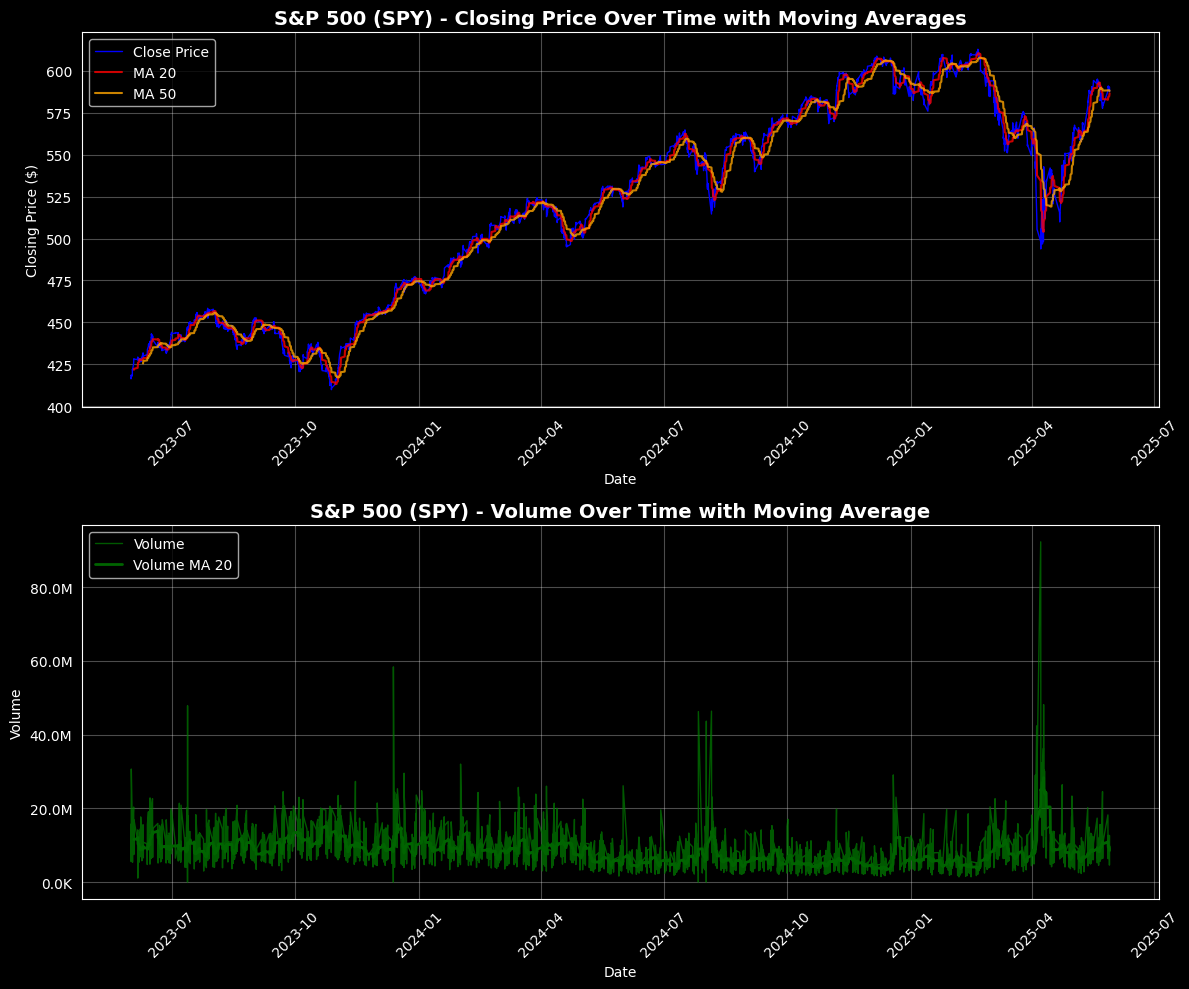

Key Insights:
Highest closing price: $612.90
Lowest closing price: $409.82
Average closing price: $518.95
Current MA 20: $586.67
Current MA 50: $588.13
Highest volume: 92,264,010
Average volume: 8,138,948
Current Volume MA 20: 8,573,834


In [56]:
spy_data = pd.read_csv(DATA_PATH + 'SPY_hourly.csv', skiprows=[1])
explore_data(spy_data, symbol_name='S&P 500 (SPY)')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_rsi(data, symbol_name=None):
    """Calcula e plota o RSI (Relative Strength Index) dos preços de fechamento."""

    # Certifica que a coluna de data está correta
    if not pd.api.types.is_datetime64_any_dtype(data['Datetime']):
        data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Cálculo do RSI
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    average_gain = gain.rolling(window=14).mean()
    average_loss = loss.rolling(window=14).mean()

    rs = average_gain / average_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(data['Datetime'], data['RSI'], label='RSI (14 períodos)', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Sobrecompra (70)')
    plt.axhline(30, color='green', linestyle='--', label='Sobrevenda (30)')
    plt.title(f'{symbol_name} - Índice de Força Relativa (RSI)')
    plt.xlabel('Data')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return None


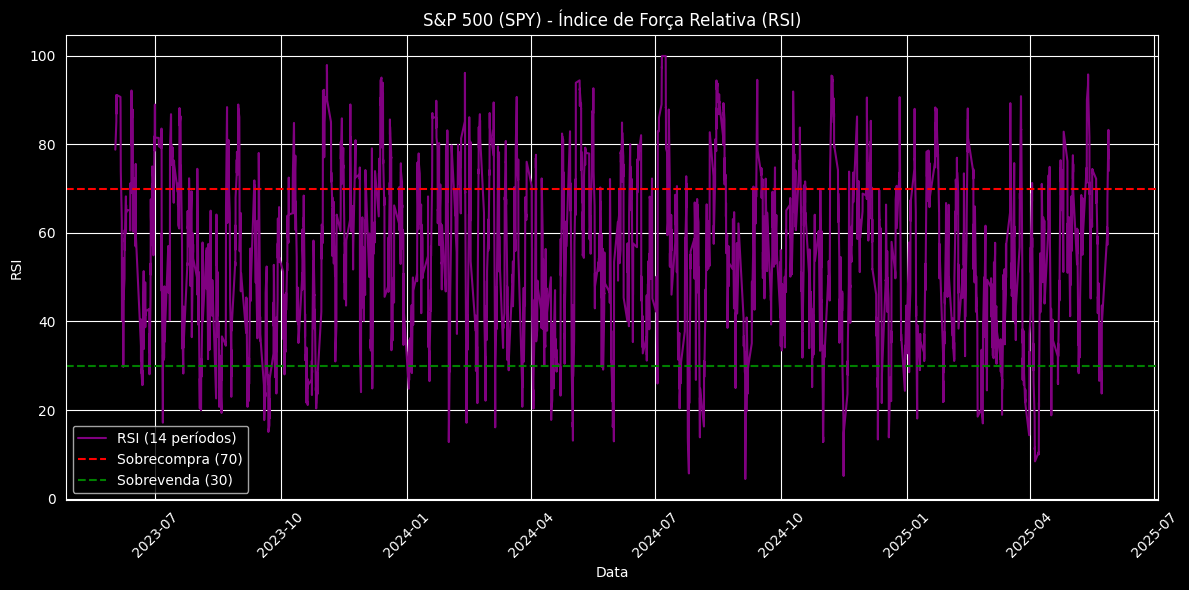

In [58]:
plot_rsi(spy_data, symbol_name='S&P 500 (SPY)')

/tmp/ipykernel_11216/623316200.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['EMA_Signal'][1:] = (data['EMA_Crossover'][1:] * data['EMA_Crossover'][:-1].values < 0).astype(int)
/tmp/ipykernel_11216/623316200.py:25: SettingWithCop

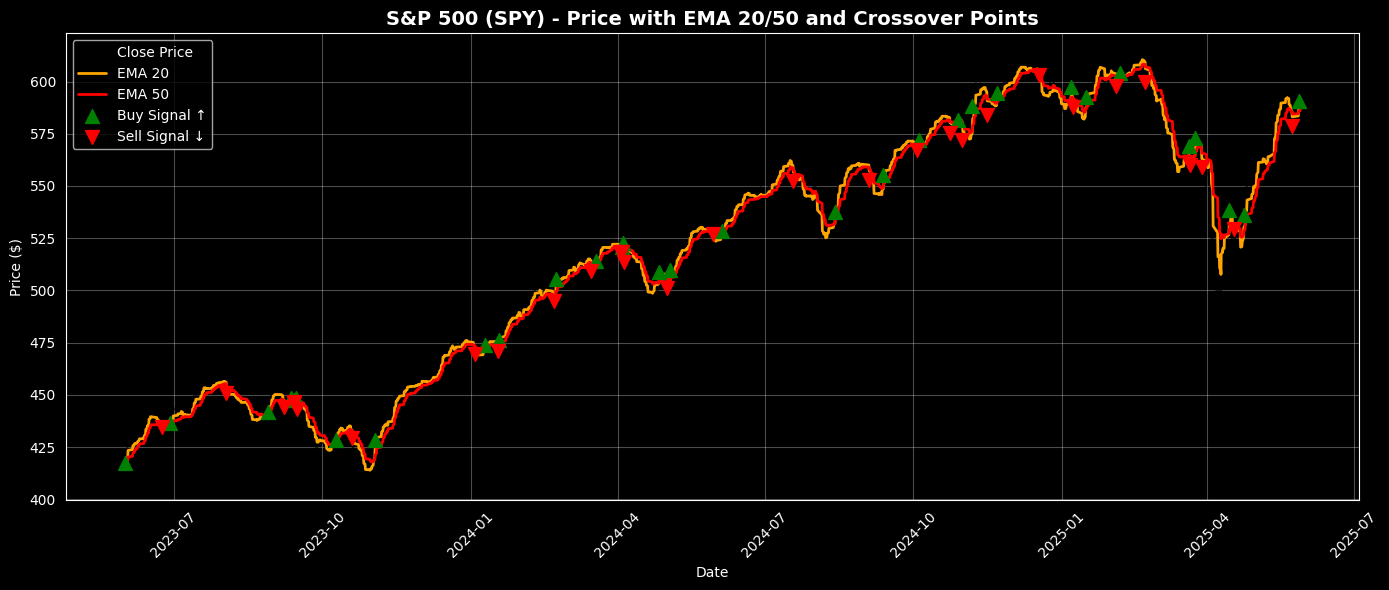

/tmp/ipykernel_11216/623316200.py:72: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['SMA_Signal'][1:] = (data['SMA_Crossover'][1:] * data['SMA_Crossover'][:-1].values < 0).astype(int)
/tmp/ipykernel_11216/623316200.py:72: SettingWithCop

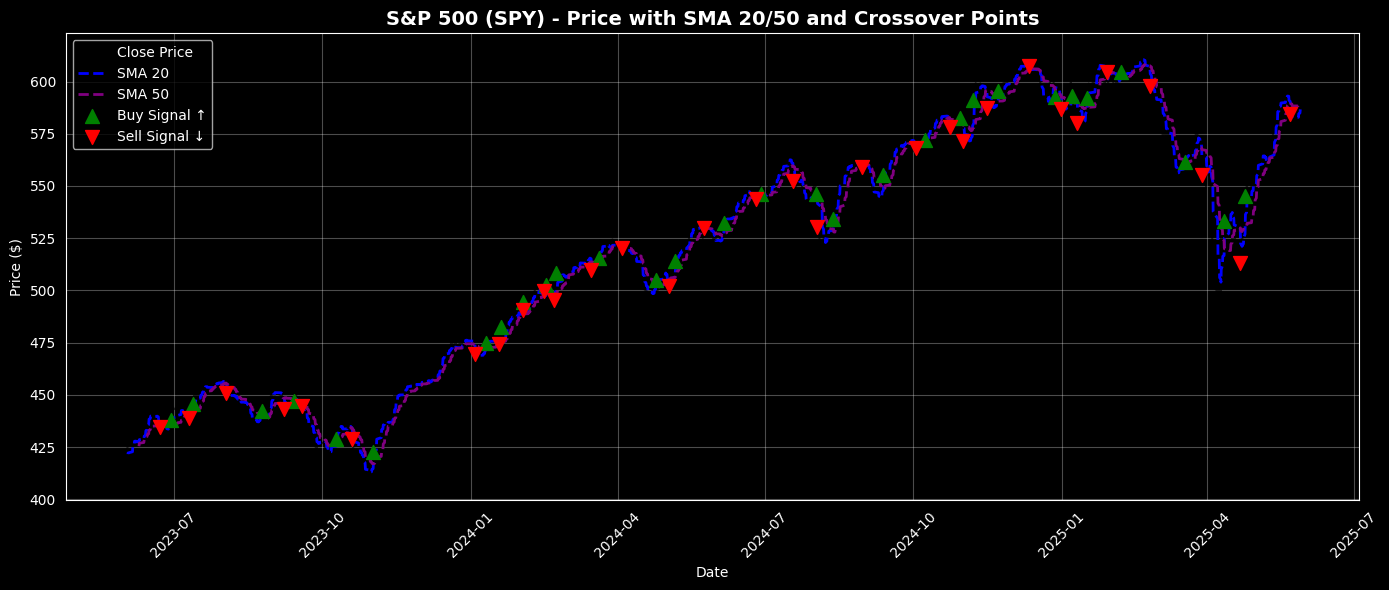

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_ema_indicators(data, symbol="Asset"):
    """
    Plot Close price with EMA 20 and EMA 50, and highlight crossover points.
    
    Args:
        data (pd.DataFrame): Must contain 'Datetime' and 'Close' columns.
        symbol (str): Optional name of the stock for labeling.
    """
    # Ensure 'Datetime' is in datetime format
    data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Calculate 20 and 50-period EMA
    data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

    # Identify crossover points (EMA 20 vs EMA 50)
    crossover = data['EMA_20'] - data['EMA_50']
    data['EMA_Crossover'] = crossover

    # Signal: Where EMA 20 crosses EMA 50 upwards (buy) or downwards (sell)
    data['EMA_Signal'] = 0
    data['EMA_Signal'][1:] = (data['EMA_Crossover'][1:] * data['EMA_Crossover'][:-1].values < 0).astype(int)
    buy_signals = data[(data['EMA_Signal'] == 1) & (data['EMA_Crossover'] > 0)]
    sell_signals = data[(data['EMA_Signal'] == 1) & (data['EMA_Crossover'] < 0)]

    # Plot the price and EMAs
    plt.figure(figsize=(14, 6))
    plt.plot(data['Datetime'], data['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(data['Datetime'], data['EMA_20'], label='EMA 20', color='orange', linewidth=2)
    plt.plot(data['Datetime'], data['EMA_50'], label='EMA 50', color='red', linewidth=2)

    # Add crossover markers
    plt.scatter(buy_signals['Datetime'], buy_signals['Close'], label='Buy Signal ↑', marker='^', color='green', s=100, zorder=5)
    plt.scatter(sell_signals['Datetime'], sell_signals['Close'], label='Sell Signal ↓', marker='v', color='red', s=100, zorder=5)

    # Plot decorations
    plt.title(f"{symbol} - Price with EMA 20/50 and Crossover Points", fontsize=14, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return None

def visualize_sma_indicators(data, symbol="Asset"):
    """
    Plot Close price with SMA 20 and SMA 50, and highlight crossover points.
    
    Args:
        data (pd.DataFrame): Must contain 'Datetime' and 'Close' columns.
        symbol (str): Optional name of the stock for labeling.
    """
    # Ensure 'Datetime' is in datetime format
    data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Calculate 20 and 50-period SMA
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()

    # Identify crossover points (SMA 20 vs SMA 50)
    crossover = data['SMA_20'] - data['SMA_50']
    data['SMA_Crossover'] = crossover

    # Signal: Where SMA 20 crosses SMA 50 upwards (buy) or downwards (sell)
    data['SMA_Signal'] = 0
    data['SMA_Signal'][1:] = (data['SMA_Crossover'][1:] * data['SMA_Crossover'][:-1].values < 0).astype(int)
    buy_signals = data[(data['SMA_Signal'] == 1) & (data['SMA_Crossover'] > 0)]
    sell_signals = data[(data['SMA_Signal'] == 1) & (data['SMA_Crossover'] < 0)]

    # Plot the price and SMAs
    plt.figure(figsize=(14, 6))
    plt.plot(data['Datetime'], data['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(data['Datetime'], data['SMA_20'], label='SMA 20', color='blue', linewidth=2, linestyle='--')
    plt.plot(data['Datetime'], data['SMA_50'], label='SMA 50', color='purple', linewidth=2, linestyle='--')

    # Add crossover markers
    plt.scatter(buy_signals['Datetime'], buy_signals['Close'], label='Buy Signal ↑', marker='^', color='green', s=100, zorder=5)
    plt.scatter(sell_signals['Datetime'], sell_signals['Close'], label='Sell Signal ↓', marker='v', color='red', s=100, zorder=5)

    # Plot decorations
    plt.title(f"{symbol} - Price with SMA 20/50 and Crossover Points", fontsize=14, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return None

# Usage examples:
visualize_ema_indicators(spy_data, symbol="S&P 500 (SPY)")
visualize_sma_indicators(spy_data, symbol="S&P 500 (SPY)")

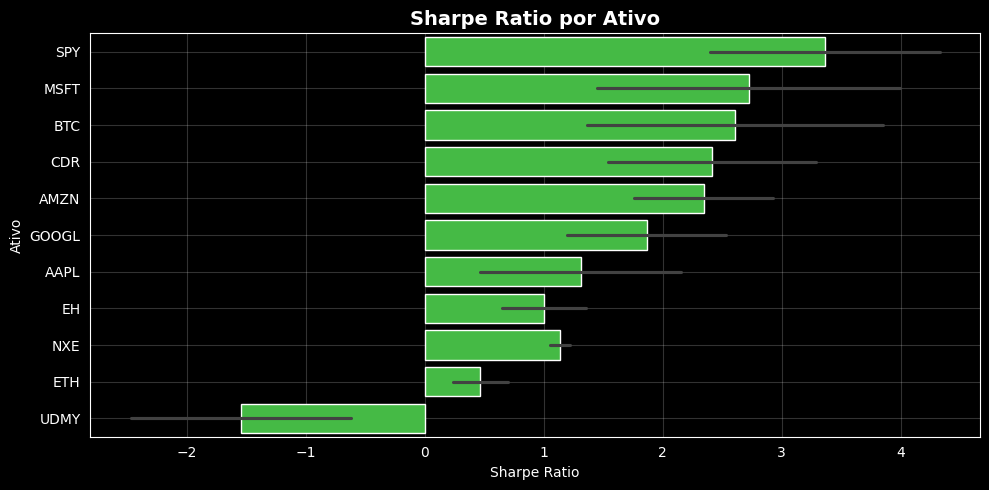

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def explore_data_normalized(data, symbol_name=None, ma_periods=[20, 50]):
    """Generate basic statistics and visualizations of normalized market data with moving averages."""
    
    # Print basic info about the dataset
    print(f"Dataset Info for {symbol_name if symbol_name else 'Stock'}:")
    print(f"Shape: {data.shape}")
    print(f"Date range: {data.iloc[0, 0]} to {data.iloc[-1, 0]}")
    
    # Determine the datetime column name
    datetime_col = 'Datetime' if 'Datetime' in data.columns else 'Date'
    
    # Convert datetime column to datetime type if it's not already
    data[datetime_col] = pd.to_datetime(data[datetime_col])
    
    # Initialize MinMax scalers
    price_scaler = MinMaxScaler()
    volume_scaler = MinMaxScaler()
    
    # Normalize Close price
    data['Close_normalized'] = price_scaler.fit_transform(data[['Close']])
    
    # Normalize Volume
    data['Volume_normalized'] = volume_scaler.fit_transform(data[['Volume']])
    
    # Calculate moving averages for normalized closing price
    for period in ma_periods:
        data[f'MA_{period}_normalized'] = data['Close_normalized'].rolling(window=period).mean()
    
    # Calculate moving average for normalized volume
    volume_ma_period = ma_periods[0]
    data[f'Volume_MA_{volume_ma_period}_normalized'] = data['Volume_normalized'].rolling(window=volume_ma_period).mean()
    
    # Set dark blue theme
    plt.style.use('dark_background')
    
    # Create subplots - 2 rows, 1 column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.patch.set_facecolor('#0B1426')  # Dark blue background
    
    # Plot 1: Normalized Closing Price over time with moving averages
    ax1.set_facecolor('#0B1426')  # Dark blue background
    ax1.plot(data[datetime_col], data['Close_normalized'], color='#4A90E2', linewidth=1, label='Normalized Close Price')
    
    # Add normalized moving averages to price chart - dark blue theme
    colors = ['#FF6B6B', '#FFB366', '#A78BFA', '#F59E0B']  # Contrasting colors for dark blue theme
    for i, period in enumerate(ma_periods):
        color = colors[i % len(colors)]
        ax1.plot(data[datetime_col], data[f'MA_{period}_normalized'], 
                color=color, linewidth=1.5, alpha=0.8, label=f'Normalized MA {period}')
    
    ax1.set_title(f'{symbol_name if symbol_name else "Stock"} - Normalized Closing Price with Moving Averages', 
                 fontsize=14, fontweight='bold', color='white')
    ax1.set_xlabel('Date', color='white')
    ax1.set_ylabel('Normalized Price (0-1)', color='white')
    ax1.grid(True, alpha=0.3, color='#2D3748')
    ax1.tick_params(axis='x', rotation=45, colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.legend(loc='upper left', facecolor='#1A202C', edgecolor='white', labelcolor='white')
    ax1.set_ylim(0, 1)
    
    # Plot 2: Normalized Volume over time with moving average
    ax2.set_facecolor('#0B1426')  # Dark blue background
    ax2.plot(data[datetime_col], data['Volume_normalized'], color='#48BB78', linewidth=1, alpha=0.7, label='Normalized Volume')
    ax2.plot(data[datetime_col], data[f'Volume_MA_{volume_ma_period}_normalized'], 
            color='#38A169', linewidth=2, label=f'Normalized Volume MA {volume_ma_period}')
    
    ax2.set_title(f'{symbol_name if symbol_name else "Stock"} - Normalized Volume with Moving Average', 
                 fontsize=14, fontweight='bold', color='white')
    ax2.set_xlabel('Date', color='white')
    ax2.set_ylabel('Normalized Volume (0-1)', color='white')
    ax2.grid(True, alpha=0.3, color='#2D3748')
    ax2.tick_params(axis='x', rotation=45, colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.legend(loc='upper left', facecolor='#1A202C', edgecolor='white', labelcolor='white')
    ax2.set_ylim(0, 1)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    
    # Print insights for both original and normalized data
    print(f"\nOriginal Data Insights:")
    print(f"Highest closing price: ${data['Close'].max():.2f}")
    print(f"Lowest closing price: ${data['Close'].min():.2f}")
    print(f"Average closing price: ${data['Close'].mean():.2f}")
    print(f"Price range: ${data['Close'].max() - data['Close'].min():.2f}")
    
    print(f"\nNormalized Data Insights:")
    print(f"Normalized price range: 0.00 to 1.00")
    print(f"Current normalized price: {data['Close_normalized'].iloc[-1]:.4f}")
    print(f"Current normalized MA {ma_periods[0]}: {data[f'MA_{ma_periods[0]}_normalized'].iloc[-1]:.4f}")
    print(f"Current normalized MA {ma_periods[1]}: {data[f'MA_{ma_periods[1]}_normalized'].iloc[-1]:.4f}")
    print(f"Current normalized volume: {data['Volume_normalized'].iloc[-1]:.4f}")
    
    return data, price_scaler, volume_scaler

def visualize_ema_indicators_normalized(data, symbol="Asset"):
    """
    Plot normalized Close price with EMA 20 and EMA 50, and highlight crossover points.
    """
    # Ensure 'Datetime' is in datetime format
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    
    # Normalize the data
    scaler = MinMaxScaler()
    data['Close_normalized'] = scaler.fit_transform(data[['Close']])

    # Calculate 20 and 50-period EMA on normalized data
    data['EMA_20_normalized'] = data['Close_normalized'].ewm(span=20, adjust=False).mean()
    data['EMA_50_normalized'] = data['Close_normalized'].ewm(span=50, adjust=False).mean()

    # Identify crossover points
    crossover = data['EMA_20_normalized'] - data['EMA_50_normalized']
    data['EMA_Crossover'] = crossover

    # Signal detection
    data['EMA_Signal'] = 0
    data['EMA_Signal'][1:] = (data['EMA_Crossover'][1:] * data['EMA_Crossover'][:-1].values < 0).astype(int)
    buy_signals = data[(data['EMA_Signal'] == 1) & (data['EMA_Crossover'] > 0)]
    sell_signals = data[(data['EMA_Signal'] == 1) & (data['EMA_Crossover'] < 0)]

    # Set dark blue theme
    plt.style.use('dark_background')
    
    # Plot the normalized price and EMAs
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.patch.set_facecolor('#0B1426')
    ax.set_facecolor('#0B1426')
    
    ax.plot(data['Datetime'], data['Close_normalized'], label='Normalized Close Price', color='#E2E8F0', alpha=0.6)
    ax.plot(data['Datetime'], data['EMA_20_normalized'], label='Normalized EMA 20', color='#FFB366', linewidth=2)
    ax.plot(data['Datetime'], data['EMA_50_normalized'], label='Normalized EMA 50', color='#FF6B6B', linewidth=2)

    # Add crossover markers
    ax.scatter(buy_signals['Datetime'], buy_signals['Close_normalized'], label='Buy Signal ↑', marker='^', color='#48BB78', s=100, zorder=5)
    ax.scatter(sell_signals['Datetime'], sell_signals['Close_normalized'], label='Sell Signal ↓', marker='v', color='#F56565', s=100, zorder=5)

    # Plot decorations
    ax.set_title(f"{symbol} - Normalized Price with EMA 20/50 and Crossover Points", fontsize=14, fontweight='bold', color='white')
    ax.set_xlabel("Date", color='white')
    ax.set_ylabel("Normalized Price (0-1)", color='white')
    ax.legend(facecolor='#1A202C', edgecolor='white', labelcolor='white')
    ax.grid(True, alpha=0.3, color='#2D3748')
    ax.tick_params(axis='x', rotation=45, colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.show()

    return None

def visualize_sma_indicators_normalized(data, symbol="Asset"):
    """
    Plot normalized Close price with SMA 20 and SMA 50, and highlight crossover points.
    """
    # Ensure 'Datetime' is in datetime format
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    
    # Normalize the data
    scaler = MinMaxScaler()
    data['Close_normalized'] = scaler.fit_transform(data[['Close']])

    # Calculate 20 and 50-period SMA on normalized data
    data['SMA_20_normalized'] = data['Close_normalized'].rolling(window=20).mean()
    data['SMA_50_normalized'] = data['Close_normalized'].rolling(window=50).mean()

    # Identify crossover points
    crossover = data['SMA_20_normalized'] - data['SMA_50_normalized']
    data['SMA_Crossover'] = crossover

    # Signal detection
    data['SMA_Signal'] = 0
    data['SMA_Signal'][1:] = (data['SMA_Crossover'][1:] * data['SMA_Crossover'][:-1].values < 0).astype(int)
    buy_signals = data[(data['SMA_Signal'] == 1) & (data['SMA_Crossover'] > 0)]
    sell_signals = data[(data['SMA_Signal'] == 1) & (data['SMA_Crossover'] < 0)]

    # Set dark blue theme
    plt.style.use('dark_background')
    
    # Plot the normalized price and SMAs
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.patch.set_facecolor('#0B1426')
    ax.set_facecolor('#0B1426')
    
    ax.plot(data['Datetime'], data['Close_normalized'], label='Normalized Close Price', color='#E2E8F0', alpha=0.6)
    ax.plot(data['Datetime'], data['SMA_20_normalized'], label='Normalized SMA 20', color='#4A90E2', linewidth=2, linestyle='--')
    ax.plot(data['Datetime'], data['SMA_50_normalized'], label='Normalized SMA 50', color='#A78BFA', linewidth=2, linestyle='--')

    # Add crossover markers
    ax.scatter(buy_signals['Datetime'], buy_signals['Close_normalized'], label='Buy Signal ↑', marker='^', color='#48BB78', s=100, zorder=5)
    ax.scatter(sell_signals['Datetime'], sell_signals['Close_normalized'], label='Sell Signal ↓', marker='v', color='#F56565', s=100, zorder=5)

    # Plot decorations
    ax.set_title(f"{symbol} - Normalized Price with SMA 20/50 and Crossover Points", fontsize=14, fontweight='bold', color='white')
    ax.set_xlabel("Date", color='white')
    ax.set_ylabel("Normalized Price (0-1)", color='white')
    ax.legend(facecolor='#1A202C', edgecolor='white', labelcolor='white')
    ax.grid(True, alpha=0.3, color='#2D3748')
    ax.tick_params(axis='x', rotation=45, colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.show()

    return None

# Usage examples with normalized data:
normalized_data, price_scaler, volume_scaler = explore_data_normalized(spy_data, symbol_name='S&P 500 (SPY)')
visualize_ema_indicators_normalized(spy_data.copy(), symbol="S&P 500 (SPY)")
visualize_sma_indicators_normalized(spy_data.copy(), symbol="S&P 500 (SPY)")

Dataset Info for S&P 500 (SPY):
Shape: (3480, 18)
Date range: 2023-05-31 13:30:00+00:00 to 2025-05-28 19:30:00+00:00


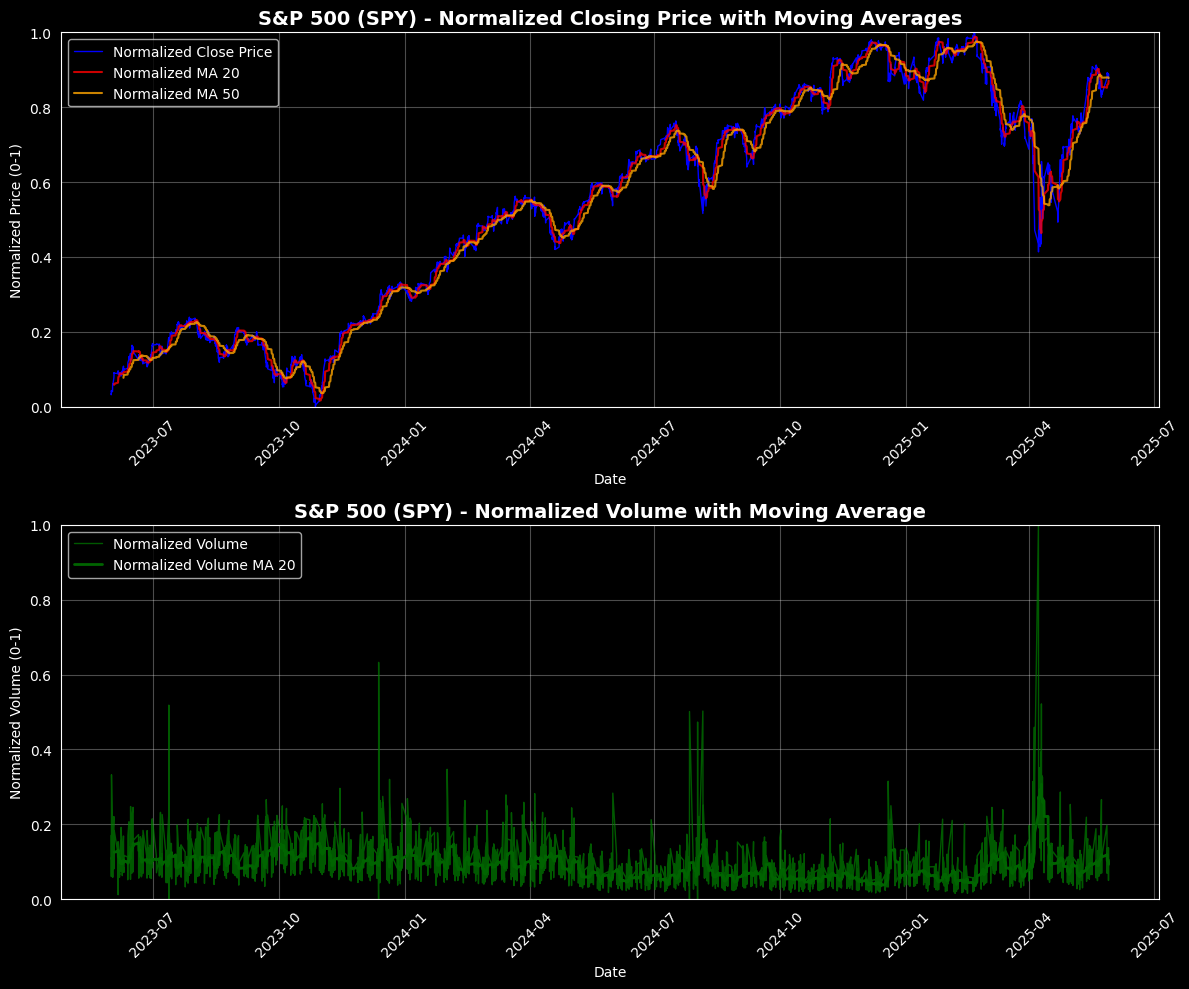


Original Data Insights:
Highest closing price: $612.90
Lowest closing price: $409.82
Average closing price: $518.95
Price range: $203.08

Normalized Data Insights:
Normalized price range: 0.00 to 1.00
Current normalized price: 0.8760
Current normalized MA 20: 0.8708
Current normalized MA 50: 0.8780
Current normalized volume: 0.1368


/tmp/ipykernel_11216/340527280.py:115: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['EMA_Signal'][1:] = (data['EMA_Crossover'][1:] * data['EMA_Crossover'][:-1].values < 0).astype(int)
/tmp/ipykernel_11216/340527280.py:115: SettingWithC

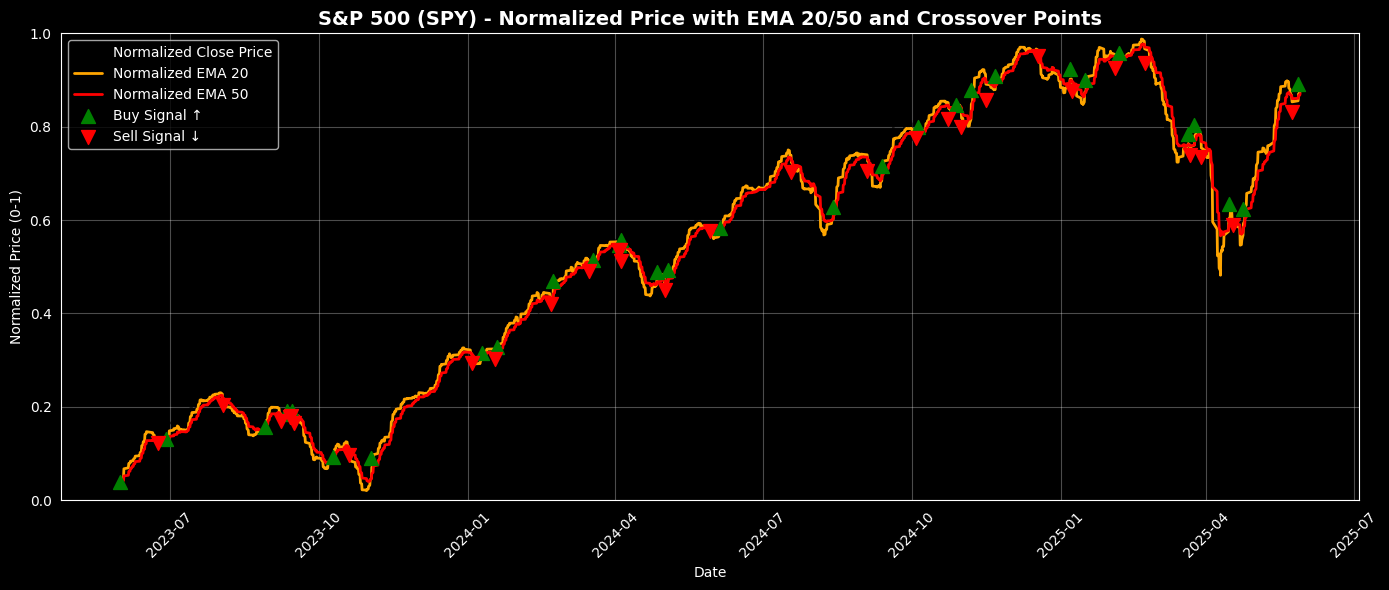

/tmp/ipykernel_11216/340527280.py:163: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['SMA_Signal'][1:] = (data['SMA_Crossover'][1:] * data['SMA_Crossover'][:-1].values < 0).astype(int)
/tmp/ipykernel_11216/340527280.py:163: SettingWithC

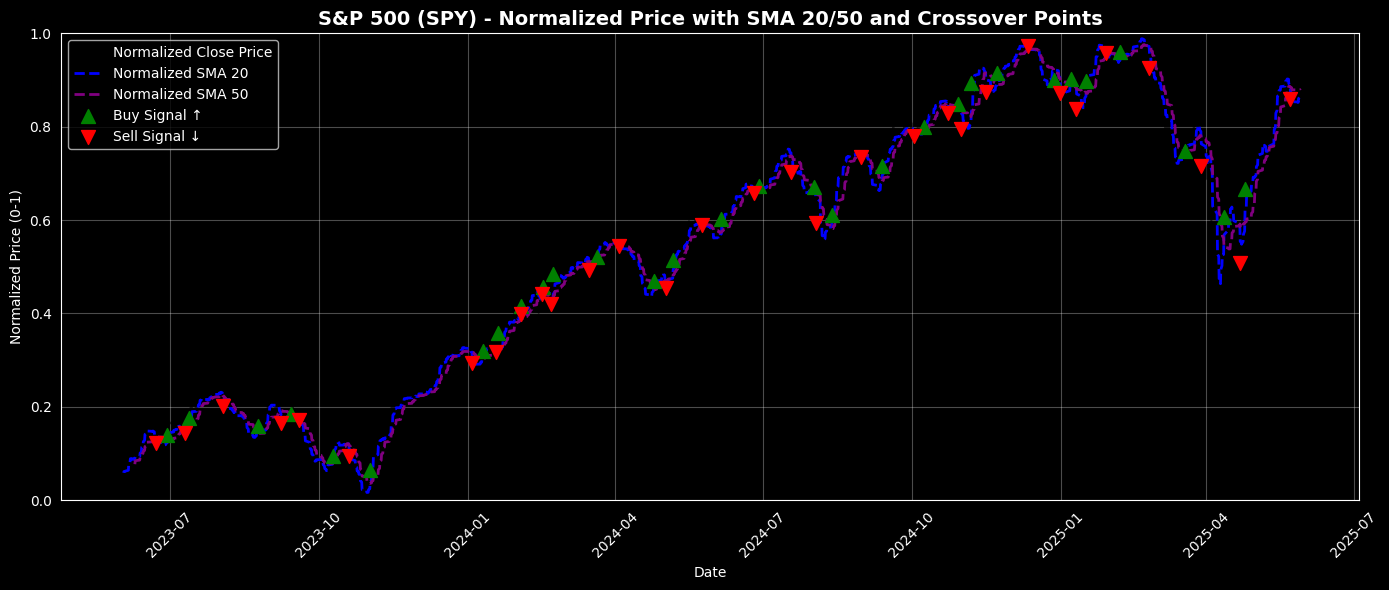

In [61]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def explore_data_normalized(data, symbol_name=None, ma_periods=[20, 50]):
    """Generate basic statistics and visualizations of normalized market data with moving averages."""
    
    # Print basic info about the dataset
    print(f"Dataset Info for {symbol_name if symbol_name else 'Stock'}:")
    print(f"Shape: {data.shape}")
    print(f"Date range: {data.iloc[0, 0]} to {data.iloc[-1, 0]}")
    
    # Determine the datetime column name
    datetime_col = 'Datetime' if 'Datetime' in data.columns else 'Date'
    
    # Convert datetime column to datetime type if it's not already
    data[datetime_col] = pd.to_datetime(data[datetime_col])
    
    # Initialize MinMax scalers
    price_scaler = MinMaxScaler()
    volume_scaler = MinMaxScaler()
    
    # Normalize Close price
    data['Close_normalized'] = price_scaler.fit_transform(data[['Close']])
    
    # Normalize Volume
    data['Volume_normalized'] = volume_scaler.fit_transform(data[['Volume']])
    
    # Calculate moving averages for normalized closing price
    for period in ma_periods:
        data[f'MA_{period}_normalized'] = data['Close_normalized'].rolling(window=period).mean()
    
    # Calculate moving average for normalized volume
    volume_ma_period = ma_periods[0]
    data[f'Volume_MA_{volume_ma_period}_normalized'] = data['Volume_normalized'].rolling(window=volume_ma_period).mean()
    
    # Create subplots - 2 rows, 1 column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Normalized Closing Price over time with moving averages
    ax1.plot(data[datetime_col], data['Close_normalized'], color='blue', linewidth=1, label='Normalized Close Price')
    
    # Add normalized moving averages to price chart
    colors = ['red', 'orange', 'purple', 'brown']
    for i, period in enumerate(ma_periods):
        color = colors[i % len(colors)]
        ax1.plot(data[datetime_col], data[f'MA_{period}_normalized'], 
                color=color, linewidth=1.5, alpha=0.8, label=f'Normalized MA {period}')
    
    ax1.set_title(f'{symbol_name if symbol_name else "Stock"} - Normalized Closing Price with Moving Averages', 
                 fontsize=14, fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Normalized Price (0-1)')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left')
    ax1.set_ylim(0, 1)
    
    # Plot 2: Normalized Volume over time with moving average
    ax2.plot(data[datetime_col], data['Volume_normalized'], color='green', linewidth=1, alpha=0.7, label='Normalized Volume')
    ax2.plot(data[datetime_col], data[f'Volume_MA_{volume_ma_period}_normalized'], 
            color='darkgreen', linewidth=2, label=f'Normalized Volume MA {volume_ma_period}')
    
    ax2.set_title(f'{symbol_name if symbol_name else "Stock"} - Normalized Volume with Moving Average', 
                 fontsize=14, fontweight='bold')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Normalized Volume (0-1)')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(loc='upper left')
    ax2.set_ylim(0, 1)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    
    # Print insights for both original and normalized data
    print(f"\nOriginal Data Insights:")
    print(f"Highest closing price: ${data['Close'].max():.2f}")
    print(f"Lowest closing price: ${data['Close'].min():.2f}")
    print(f"Average closing price: ${data['Close'].mean():.2f}")
    print(f"Price range: ${data['Close'].max() - data['Close'].min():.2f}")
    
    print(f"\nNormalized Data Insights:")
    print(f"Normalized price range: 0.00 to 1.00")
    print(f"Current normalized price: {data['Close_normalized'].iloc[-1]:.4f}")
    print(f"Current normalized MA {ma_periods[0]}: {data[f'MA_{ma_periods[0]}_normalized'].iloc[-1]:.4f}")
    print(f"Current normalized MA {ma_periods[1]}: {data[f'MA_{ma_periods[1]}_normalized'].iloc[-1]:.4f}")
    print(f"Current normalized volume: {data['Volume_normalized'].iloc[-1]:.4f}")
    
    return data, price_scaler, volume_scaler

def visualize_ema_indicators_normalized(data, symbol="Asset"):
    """
    Plot normalized Close price with EMA 20 and EMA 50, and highlight crossover points.
    """
    # Ensure 'Datetime' is in datetime format
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    
    # Normalize the data
    scaler = MinMaxScaler()
    data['Close_normalized'] = scaler.fit_transform(data[['Close']])

    # Calculate 20 and 50-period EMA on normalized data
    data['EMA_20_normalized'] = data['Close_normalized'].ewm(span=20, adjust=False).mean()
    data['EMA_50_normalized'] = data['Close_normalized'].ewm(span=50, adjust=False).mean()

    # Identify crossover points
    crossover = data['EMA_20_normalized'] - data['EMA_50_normalized']
    data['EMA_Crossover'] = crossover

    # Signal detection
    data['EMA_Signal'] = 0
    data['EMA_Signal'][1:] = (data['EMA_Crossover'][1:] * data['EMA_Crossover'][:-1].values < 0).astype(int)
    buy_signals = data[(data['EMA_Signal'] == 1) & (data['EMA_Crossover'] > 0)]
    sell_signals = data[(data['EMA_Signal'] == 1) & (data['EMA_Crossover'] < 0)]

    # Plot the normalized price and EMAs
    plt.figure(figsize=(14, 6))
    plt.plot(data['Datetime'], data['Close_normalized'], label='Normalized Close Price', color='black', alpha=0.6)
    plt.plot(data['Datetime'], data['EMA_20_normalized'], label='Normalized EMA 20', color='orange', linewidth=2)
    plt.plot(data['Datetime'], data['EMA_50_normalized'], label='Normalized EMA 50', color='red', linewidth=2)

    # Add crossover markers
    plt.scatter(buy_signals['Datetime'], buy_signals['Close_normalized'], label='Buy Signal ↑', marker='^', color='green', s=100, zorder=5)
    plt.scatter(sell_signals['Datetime'], sell_signals['Close_normalized'], label='Sell Signal ↓', marker='v', color='red', s=100, zorder=5)

    # Plot decorations
    plt.title(f"{symbol} - Normalized Price with EMA 20/50 and Crossover Points", fontsize=14, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Normalized Price (0-1)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    return None

def visualize_sma_indicators_normalized(data, symbol="Asset"):
    """
    Plot normalized Close price with SMA 20 and SMA 50, and highlight crossover points.
    """
    # Ensure 'Datetime' is in datetime format
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    
    # Normalize the data
    scaler = MinMaxScaler()
    data['Close_normalized'] = scaler.fit_transform(data[['Close']])

    # Calculate 20 and 50-period SMA on normalized data
    data['SMA_20_normalized'] = data['Close_normalized'].rolling(window=20).mean()
    data['SMA_50_normalized'] = data['Close_normalized'].rolling(window=50).mean()

    # Identify crossover points
    crossover = data['SMA_20_normalized'] - data['SMA_50_normalized']
    data['SMA_Crossover'] = crossover

    # Signal detection
    data['SMA_Signal'] = 0
    data['SMA_Signal'][1:] = (data['SMA_Crossover'][1:] * data['SMA_Crossover'][:-1].values < 0).astype(int)
    buy_signals = data[(data['SMA_Signal'] == 1) & (data['SMA_Crossover'] > 0)]
    sell_signals = data[(data['SMA_Signal'] == 1) & (data['SMA_Crossover'] < 0)]

    # Plot the normalized price and SMAs
    plt.figure(figsize=(14, 6))
    plt.plot(data['Datetime'], data['Close_normalized'], label='Normalized Close Price', color='black', alpha=0.6)
    plt.plot(data['Datetime'], data['SMA_20_normalized'], label='Normalized SMA 20', color='blue', linewidth=2, linestyle='--')
    plt.plot(data['Datetime'], data['SMA_50_normalized'], label='Normalized SMA 50', color='purple', linewidth=2, linestyle='--')

    # Add crossover markers
    plt.scatter(buy_signals['Datetime'], buy_signals['Close_normalized'], label='Buy Signal ↑', marker='^', color='green', s=100, zorder=5)
    plt.scatter(sell_signals['Datetime'], sell_signals['Close_normalized'], label='Sell Signal ↓', marker='v', color='red', s=100, zorder=5)

    # Plot decorations
    plt.title(f"{symbol} - Normalized Price with SMA 20/50 and Crossover Points", fontsize=14, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Normalized Price (0-1)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    return None

# Usage examples with normalized data:
normalized_data, price_scaler, volume_scaler = explore_data_normalized(spy_data, symbol_name='S&P 500 (SPY)')
visualize_ema_indicators_normalized(spy_data.copy(), symbol="S&P 500 (SPY)")
visualize_sma_indicators_normalized(spy_data.copy(), symbol="S&P 500 (SPY)")